<a href="https://colab.research.google.com/github/levynlee/ESAA/blob/main/1108_%ED%95%84%EC%82%AC%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PART03. 케라스(Keras)**

##**1. 딥러닝 준비**

케라스의 본래 목적은 딥러닝 라이브러리를 쉽고 간결한 코드로 실행할 수 있게 만들어주는 것이다.

###**1-1. 주요 용어**

####**1-1-1. 하이퍼 파라미터**

딥러닝에서의 하이퍼파라미터는 파이썬의 파라미터와는 다른 의미를 갖는다.  

하이퍼파라미터는 딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정값을 뜻한다. 모델이 훈련하면서 가중치(weights)와 편향(bias)은 자동 업데이트되고 조정되며 알아서 변하는 값들이지만, 그 외에 학습 속도나 반복 훈련 횟수 등 사용자가 직접 설정해야 하는 값들이 매우 많다.

사용자가 어떠한 값을 설정하느냐에 따라 모델의 성능 및 결과가 달라지기 때문에 하이퍼파라미터는 매우 중요하다. 사용자가 별도로 설정해주지 않으면 기본값이 자동으로 적용된다.  

모델의 예측 성능을 높이기 위해 하이퍼파라미터 값들을 조절하는 데 많은 시간을 투자하는 것이 일반적이며, 하이퍼파라미터의 값을 조절하는 행위를 **하이퍼파라미터 튜닝**이라고도 한다.

딥러닝 프로젝트를 실행하는 초기 단계에 많은 시간을 튜닝하는 데 투자하는 것보다 **가장 마지막 단계**에 진행하는 것을 추천한다.

####**1-1-2. 과소적합 vs. 과대적합 (underfitting vs. overfitting)**

훈련용 데이터  
- 머신러닝 모델이 학습할 데이터  

예측용 데이터
- 정답 레이블이 없는, 머신러닝 모델이 예측해야 하는 대상 데이터  




훈련용 데이터를 반복적으로 학습하면서 모델은 사람이 발견하지 못하는 패턴을 발견함으로써 사람의 예측 성능을 뛰어 넘는 모델을 생성할 수 있다.  

하지만 예측할 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나 혹은 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어져 있다면 모델이 학습한 후 예측 성능이 현저히 떨어지게 된다.

모델을 학습시킬 때는 과소적합과 과대적합 문제를 최소화하면서 정확도를 가장 높일 수 있도록 해야 한다. 훈련 데이터를 잘 구성하는 것도 중요하다. 예측 데이터와 분포가 동일하게 구성해야 하며 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소해야 한다. 또한 훈련 데이터의 일부를 검증 데이터로 활용하여 검증 성능이 가장 좋은 구간을 모델의 가장 이상적으로 학습된 지점이라 판단하는 방법으로 최종 모델을 결정한다.

####**1-1-3. 에포크(epoch)**

딥러닝은 **데이터셋을 학습하는 과정을 여러 번 반복**하면서 최적의 모델 가중치를 찾는 과정이다. 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프를 1 epoch라고 한다.  

훈련 데이터셋을 빠짐없이 모두 한 번 모델 훈련에 사용하면 1 epoch의 훈련 과정을 마치고 다음 epoch로 넘어간다. 사전에 설정된 최대 epoch 횟수까지 반복적으로 진행하고 종료된다.  

epoch 역시 중요한 하이퍼파라미터이다. 사전에 설정한 최대 epoch까지 반복 학습이 끝나더라도 모델이 과소적합되었다고 판단되면 epoch를 늘려서 다시 학습할 필요가 있다. 반대로 만약 모델이 빠르게 과대적합 구간으로 진입한다면 epoch를 줄여서 최적 구간에서 학습을 조기에 종료하는 것이 과대적합을 방지하고 시간을 절약할 수 있다.


####**1-1-4. 손실함수(loss function)**

**'예측값과 정답값의 차이 또는 오차'**  

딥러닝 모델에 적용하는 손실함수는 사용자가 정의해야 한다. 분류나 회귀 모델에 따라 손실함수를 다르게 적용하는 것이 일반적이다.   

**지도학습**의 분류 문제는 **이진 분류**와 **다중 분류**로 구분할 수 있다.   

이진 분류 문제를 해결하기 위해서는 binary_crossentropy 손실함수를 사용하며, 출력층의 활성화 함수가 sigmoid인 경우를 말한다.   

다중 분류 문제에는 categorical_crossentropy 손실함수를 사묭하며, 다중 분류의 대상이 되는 클래스가 원핫 벳터인 경우 사용한다. 정답 클래스가 원핫 인코딩이 아닌 레이블 값 (ex. 0,1,2,3,...)으로 표현되어 서로 다른 숫자로 구분되어 있으면 sparse_categorical_crossentropy 손실함수를 사용한다. 출력층의 활성함수로 softmax를 사용한다.  

한편 회귀 모델의 경우 평균제곱오차(Mean Squared Error), 평균절대값오차(Mean Absolute Error), 후버(Huber) 등이 사용된다.

딥러닝 문제에 따라서는 텐서플로에서 제공하는 손실함수로 해결하기 어려운 경우가 있다. 이럴 때는 사용자가 직접 손실함수를 만들어서 사용해야 한다. 기본 제공 손실함수와 같이 함수 형태나 클래스 형태 모두 가능하다.

####**1-1-5. 경사하강법(gradient descent)**

경사하강법은 **딥러닝 모델을 훈련할 때, 모델 내부의 가중치(weight)에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법**이다.  

딥러닝 훈련 프로세스에서 경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있다.

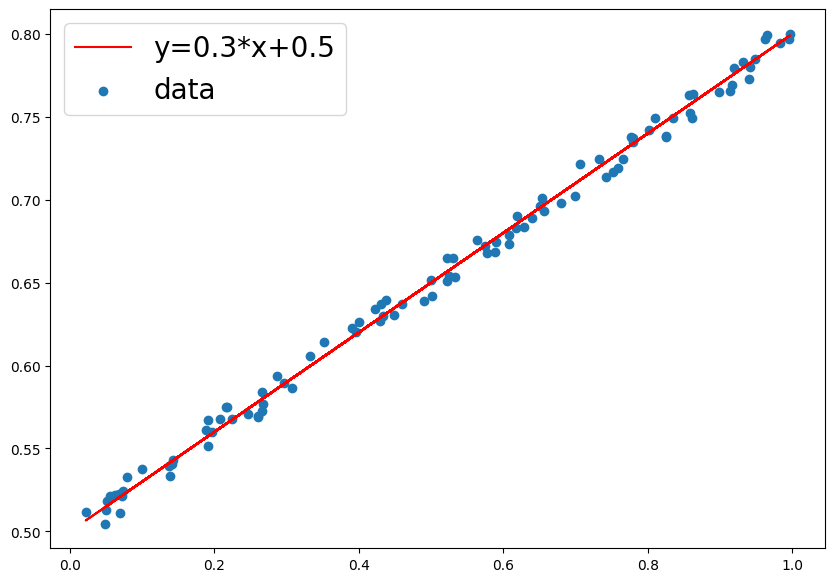

w: 0.3. b: 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt. figure(figsize=(10,7))
  plt.plot(x, y, color='r', label=f'y={w}*x+{b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w: {w}. b: {b}')
  return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

y = 0.3x + 0.5 식에 약간의 노이즈가 추가되어 y 데이터가 생성되었다.   

다음으로 w, b에 대한 그래디언트를 구한다. 그래디언트는 손실함수를 w, b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w, b로부터 차감한다.   

이후 넘파이로 최적화한다.

In [ ]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random한 값으로 w, b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5*((y_hat - y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat - y) * x).sum()
  b = b - learning_rate * ((y_hat - y)).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2}w={1:.5f}, b={2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2}w={1:.1f}, b={2:.1f}error={3:.5f}".format(epoch, w, b, error))

 0w=0.67950, b=0.24282 error = 1.67591
 5w=0.63686, b=0.31500 error = 0.54087
10w=0.58369, b=0.34439 error = 0.38505
15w=0.53874, b=0.36899 error = 0.27428
20w=0.50085, b=0.38972 error = 0.19553
25w=0.46889, b=0.40721 error = 0.13953
30w=0.44194, b=0.42195 error = 0.09971
35w=0.41922, b=0.43438 error = 0.07140
40w=0.40006, b=0.44486 error = 0.05127
45w=0.38391, b=0.45370 error = 0.03696
50w=0.37029, b=0.46116 error = 0.02678
55w=0.35880, b=0.46744 error = 0.01954
60w=0.34911, b=0.47274 error = 0.01440
65w=0.34094, b=0.47721 error = 0.01074
70w=0.33406, b=0.48098 error = 0.00814
75w=0.32825, b=0.48416 error = 0.00629
------------------------------------------------------------
80w=0.3, b=0.5error=0.00498


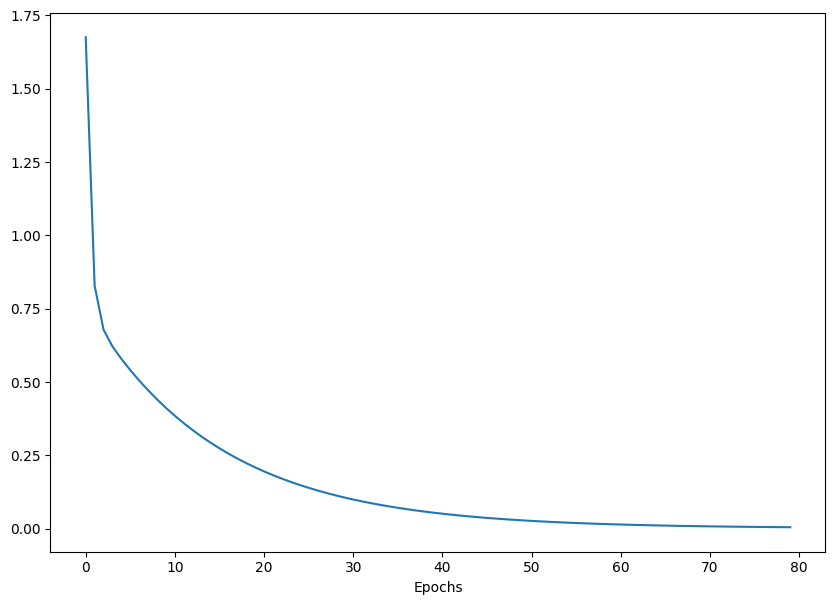

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.show()

가중치가 난수 값에 의하여 다르게 초기화되기 때문에 매번 실행할 때마다 수렴하는 속도는 차이가 있다. 하지만 결국 목표하는 오차 범위 안으로 수렴하여 반복문을 종료하게 되고, 종료 후 w,b 계수를 확인하면 샘플 데이터셋을 생성할 때 설정한 w,b 계수와 비슷한 값임을 확인할 수 있다.

###**1-2. 딥러닝 프로세스**

####**1-2-1. 데이터 전처리**

####**1-2-2. 모델 생성**

모델의 구조를 저의하고 생성하는 단계다. 모델을 생성하는 방법은 크게 세 가지로 구분할 수 있으며, 순차적인 구조의 모델은 Sequential API로 구현한다. 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델은 Functional API 혹은 Model Subclassing 방법으로 구현할 수 있다.

####**1-2-3. 모델 컴파일**

딥러닝 모델의 구조를 정의하고 생성한 뒤, 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의한다. 모델 인스턴스에 compile() 메소드를 적용하고, 앞에서 열거한 여러 가지 속성 값을 설정한다.

####**1-2-4. 모델 훈련**

fit() 함수에 모델 훈련에 필요한 정보를 매개변수(또는 파라미터)로 전달한다. 훈련 데이터셋, 검증 데이터셋, epoch, 배치(batch), 크기 및 콜백(callback) 함수 등을 지정한다.

####**1-2-5. 모델 검증**

훈련이 완료된 모델을 검증하는 단계다. 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산한다. 반환된 검증 결과를 토대로 잠재적인 모델의 성능 평가가 이뤄진다. 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델 수정을 하고, 컴파일 및 훈련 과정을 거쳐 재평가하는 단계를 통해 목표 성능에 도달할 때까지 이 과정을 반복한다.

####**1-2-6. 모델 예측**

##**2. 단순 신경망 훈련**

###**2-1. 선형회귀**

**회귀분석**이란 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법이다. **단순선형회귀**모형은 하나의 X가 Y에 미치는 영향을 추정하며 1차 함수 관계로 나타낼 수 있다.  

텐서플로 케라스를 활용하여 단순선형회귀 모델을 직접 만들고 딥러닝을 학습해보자. 이때 모델은 1차 함수식과 동일하다고 생각하면 된다. 모델의 기울기 a와 절편 b를 업데이트하면서 종속변수 Y에 가장 근사한 1차 함수식을 완성해 나간다. 딥러닝에서는 기울기 a 대신 가중치를 의미하는 w를 더 많이 사용한다. 따라서 앞으로 1차 함수식을 다음과 같이 정의하도록 한다.: **y = wx + b**  ;  w는 가중치 weight의 w이고 , b는 편향 bias의 b를 나타낸다.

###**2-2. 뉴런(Neuron)**

**뉴런**은 인공 신경망 모델을 구성하는 하나의 신경을 의미한다. 뉴런은 **노드**라고도 불린다. 신경망은 여러 개의 **레이어**를 가지며, 1개의 레이어는 1개 이상의 뉴런으로 구성된다. 뉴런의 내부에는 **가중치**가 존재하고 모델이 훈련을 진행하면서 **오차 역전파**를 통해 뉴런의 가중치가 업데이트된다.  

**역전파(back propagation)** 알고리즘은 신경망 모델의 파라미터들에 대한 그래디언트를 계산하는 방법을 의미한다. 역전파는 신경망을 구성하는 각 레이어와 관련된 손실함수를 미분한 결과인 그래디언트를 출력층에서 입력층 순으로 역으로 계산하고 저장한다.

###**2-3. Dense 레이어**

**Dense 레이어**는 심층 신경망 모델을 구성하는 가장 기본 레이어이다. 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에 **완전 연결층 Fully Connected Layer**라고 부르기도 한다. (모든 뉴런들이 정보(텐서)의 흐름을 나타내는 화살표로 연결되어 있다.)  

Dense 레이어를 구성하는 노드 개수와 활성 함수를 지정할 수 있다. 텐서플로의 layer 모듈에 있는 Dense 레이어로 쉽게 구현할 수 있다.

###**2-4. 데이터셋 만들기**

In [ ]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


**지도학습**은 정답이 있는 데이터를 활용해 데이터를 학습시키는 것이다. 모델에 주입할 입력 데이터를 **피처**라고 부르고, 정답은 **레이블**이라고 부른다.  

머신러닝의 학습 방법은 지도학습 외에도 **비지도학습**, **강화학습**, **준지도학습** 등이 있다.

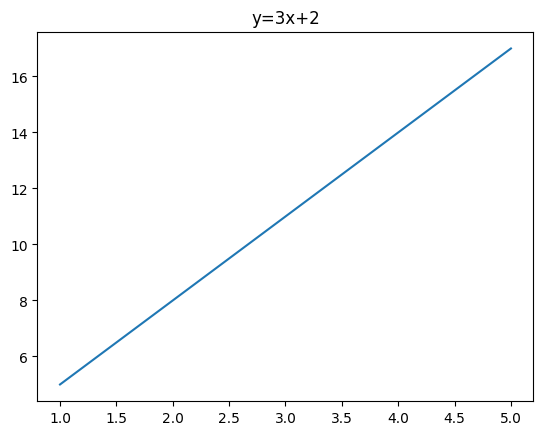

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

이제 모델에 입력할 데이터의 준비가 끝났다.

###**2-5. Sequential API**

텐서플로 케라스는 세 가지 방식으로 모델을 생성할 수 있다. 그 중 케라스의 Sequential API를 사용하면 매우 간결하게 딥러닝 모델을 만들 수 있는데, Sequential API 방식은 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식이다. 따라서, 입력 레이어부터 출력 레이어까지 순서를 갖는다.  

입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산을 수행한다.  

직관적으로 구조를 이해할 수 있기 때문에, 케라스 모델을 생성하고 훈련하는 가장 간단한 방법이라고 할 수 있다. 하지만 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없다는 단점이 있다. 이런 경우 다음에 다룰 Functional API를 사용해야 한다.

####**2-5-1. 모델 구조**

Sequantial API를 사용하여 모델 생성 시 다음과 같은 두 가지 방법으로 모델을 구성할 수 있다.  

**방법1.**  
리스트형 정의로 Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력한다. 대괄호([ ]) 안에 쉼표로 구분하여 층을 쌓는다. 앞에 위치한 층부터 연산을 먼저 처리하고 순차적으로 다음 층의 연산을 수행하게 된다. 다음 코드는 Dense 레이어 3개를 갖는 모델을 생성한다.    


In [ ]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

**방법2.**  
add 함수로 레이어 추가로 Sequential 클래스 객체를 먼저 만든 뒤에, 생성된 모델 인스턴스에 층을 추가하는 방식이다. add() 메소드 함수를 사용하여 1개의 층을 추가할 수 있다. 따라서 여러 개의 층을 추가하려면 add 함수를 반복해서 여러 번 사용해야 한다. 앞의 리스트형과 동일한 구조의 모델을 만들기 위해 다음 코드에서는 add 함수를 총 3번 사용했다.

In [ ]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

Sequential API를 활용하여 모델을 만들 때, 쌓고자 하는 레이어의 개수는 제한이 없다.

####**2-5-2. 입력 데이터 형태**

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150,4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


####**2-5-3. 단순선형회귀 모델 정의**

In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Dense 레이어는 use_bias = True가 기본 설정되어 상수항 b가 추가된다. use_bias = False로 지정하면 상수항 b를 포함하지 않게 된다.

###**2-6. 모델 요약**

Sequential API로 모델을 만들었다면 model.summary()로 모델의 요약을 확인할 수 있다.  

Total params는 모델 내부에 존재하는 모든 파라미터의 합계이다.  

Trainable params는 모델 훈련 시 업데이트할 파라미터의 총 개수이다.  

Non-trainable params는 훈련 시 업데이트하지 않을 파라미터의 총 개수이다.

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

단순선형회귀 모델에서는 업데이트 파라미터가 가중치 w와 편향 b 두 개이기 때문에 모델 요약 결과 총 파라미터의 개수가 2개로 표기되는 것을 확인할 수 있다.

###**2-7. 컴파일**

컴파일 단계에서는 모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 평가지표 등을 정의한다. 이들은 클래스 인스턴스, 함수, 사전 정의된 문자열 총 3가지 방법으로 지정될 수 있다.

In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse','mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
              ])

In [ ]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

###**2-8. 훈련**

In [ ]:
# 훈련
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - loss: 111.8918 - mae: 9.9006
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 65.3090 - mae: 7.6044
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 38.1622 - mae: 5.8514
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 22.3417 - mae: 4.5131
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 13.1216 - mae: 3.4913


In [ ]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - loss: 231.4746 - mae: 14.1038
Epoch 2/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 134.9421 - mae: 10.7989
Epoch 3/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 78.6874 - mae: 8.2759
Epoch 4/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 45.9047 - mae: 6.3498
Epoch 5/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 26.8001 - mae: 4.8793
Epoch 6/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 15.6666 - mae: 3.7566
Epoch 7/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9.1783 - mae: 2.8995
Epoch 8/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.3968 - mae: 2.2451
Epoch 9/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.1929 - mae: 1.7454
Epoch 10/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.9082 - mae: 1.3639
Epoch 11/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.1592 - mae: 1.0725
Epoch 12/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7224 - mae: 0.8500
Epoch 13/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 

충분한 epoch 동안 훈련한 후 mse, mae 모두 개선되었음을 확인할 수 있다.  

훈련에 대한 결과가 저장된 history 변수를 사용하여 epoch별 훈련 손실 및 평가지표를 시각화할 수 있다.

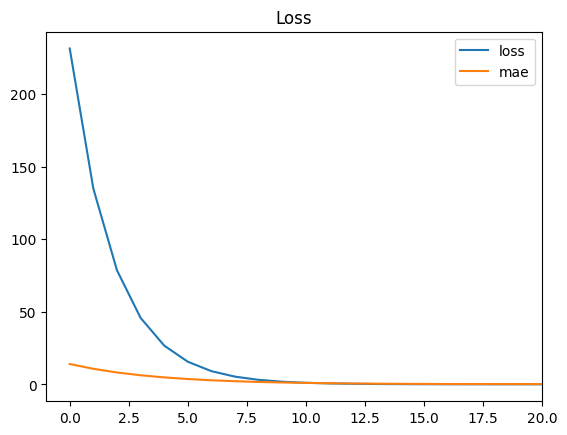

In [22]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()


###**2-9. 검증**

In [23]:
# 검증
model.evaluate(x,y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 3.6090e-05 - mae: 0.0052


[3.6089648347115144e-05, 0.005156421568244696]

###**2-10. 예측**

In [26]:
# 예측
model.predict(np.array([10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[32.02492]], dtype=float32)

##**3. 심층 신경망으로 이미지 분류**

###**3-1. 케라스 내장 데이터셋 로드**

- boston_housing: 보스턴 주택 가격 데이터셋 (회귀)
- cifar10: CIFAR10 이미지 분류 데이터셋 (분류)
- cifar100: CIFAR100 이미지 분류 데이터셋 (분류)
- mnist: mnist 손글씨 데이터셋 (분류)
- fashion_mnist: 의류 데이터셋 (분류)
- imdb: IMDb 영화 데이터셋 (분류)
- reuters: Reuters 뉴스 토픽 (분류)

In [27]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [28]:
# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


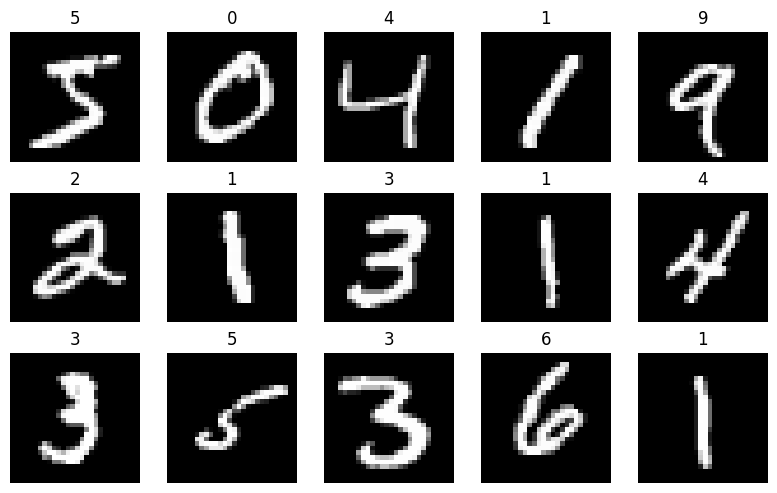

In [31]:
#데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]

  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap = 'gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

###**3-2. 데이터 전처리**

이미지 데이터에 대하여 정규화를 통해 데이터의 범위를 조절한다.

In [32]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

데이터를 확인해 보면 0부터 255까지의 범위의 값으로 이루어진 것을 확인할 수 있다. 데이터의 범위를 0부터 1 사이의 값을 가지도록 정규화하기 위해서는 데이터의 최대값인 255로 나눈다.

In [33]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값 : {x_train.min()}, 최대값 : {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값 : {x_train.min()}, 최대값 : {x_train.max()}')

정규화 전] 최소값 : 0, 최대값 : 255
정규화 후] 최소값 : 0.0, 최대값 : 1.0


In [34]:
# test 셋에서 정규화 동일 적용
x_test = x_test / x_test.max()

In [35]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

###**3-3. Flatten 레이어**

정규화를 하더라도 개별 데이터 값의 범위는 축소되지만 원본 배열의 형태는 그대로 유지된다.

샘플 이미지의 형태는 (28, 28)로 이루어져 있고 2차원 입력이다. Dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야 하므로 이미지 데이터를 1차원으로 전처리하여 주입해야 한다.

In [36]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(6000,-1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (6000, 7840)


또는 다음과 같이 Flatten 레이어를 사용하면 다차원 데이터를 1차원으로 펼쳐주는 방법도 가능하다.

In [38]:
print(f'변경 전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


###**3-4. 활성화 함수**

**활성화 함수**는 입력을 비선형 출력으로 변환해주는 함수이다.  

일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 한다. 한편, 비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면 모델을 깊게 구성하더라도 결국은 선형함수로 표현된다.  

자주 사용되는 활성화 함수로는 시그모이드, 하이퍼볼릭 탄젠트, ReLU, Leaky ReLU 등이 있다.

In [39]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

<Dense name=dense_13, built=False>

In [40]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

###**3-5. 입력과 출력**

딥러닝 모델을 만들 때는 첫 번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수를 지정하는 것이 일반적이다. 앞에서 x_train의 shape이 (60000, 28, 28) 배열이라는 것을 확인했는데, 여기서 데이터셋의 크기를 나타내는 60000이라는 숫자를 제외하고 이미지의 세로, 가로 형태를 나타내는 input_shape = (28,28)를 input_shape로 지정한다.  

분류 모델의 가장 마지막 레이어는 출력층이다. 출력층의 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야 한다. mnist는 0~9까지 총 10개의 클래스로 이루어져 있기 때문에 마지막 출력층의 노드 개수는 10개가 되어야 한다.

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드 = 10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


출력층의 노드 개수가 2개 이상인 경우는 softmax 활성화 함수를 적용한다. 즉, 다중 분류 문제에서는 softmax 활성화 함수를 적용한다.

In [42]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

<Dense name=dense_20, built=False>

###**3-6. 손실함수**

분류 모델의 경우 모델의 출력층에 따라 올바른 손실함수를 설정해야만 모델이 정상적으로 훈련할 수 있다.

In [43]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [44]:
# y가 원핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

###**3-7. 옵티마이저**

옵티마이저는 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법이다. 일반적으로 많이 사용되는 알고리즘은 Adam이다.  

케라스에서 지원하는 옵티마이저 목록은 다음과 같다: SGD, Adam, Adagrad, Nadam, RMSprop, Adadelta, Adamax, Ftrl

In [45]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

###**3-8. 평가지표**

분류 모델에 대한 평가 지표는 정확도를 나타내는 accuracy가 가장 많이 사용되며, auc, precision, recall 등의 지표도 많이 사용된다.  

모델 컴파일 단계에서 metrics 매개변수에 파이썬 리스트 형태로 하나 이상의 평가지표를 지정하여 여러 지표들을 동시에 참고할 수 있다.

In [46]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [47]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###**3-9. 훈련**

모델을 훈련할 때 검증 셋을 추가 지정하면 매 epoch마다 훈련 손실과 검증 손실, 그리고 각 셋에 대한 평가지표를 나란히 출력한다.

In [48]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8754 - loss: 0.4149 - val_accuracy: 0.9634 - val_loss: 0.1177
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9701 - loss: 0.0996 - val_accuracy: 0.9723 - val_loss: 0.0898
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9805 - loss: 0.0648 - val_accuracy: 0.9756 - val_loss: 0.0815
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9854 - loss: 0.0465 - val_accuracy: 0.9771 - val_loss: 0.0868
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9857 - loss: 0.0429 - val_accuracy: 0.9743 - val_loss: 0.0887
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9905 - loss: 0.0281 - val_accuracy: 0.9754 - val_loss: 0.0878
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9914 - loss: 0.0241 - val_accuracy: 0.9788 - val_loss: 0.0833
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9926 - loss: 0

###**3-10. 평가**

In [49]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.1126
검증 셋 정확도: 0.978600025177002


evalute( )  메소드는 컴파일 단계에서 지정한 손실과 정확도를 순서대로 반환한다.

###**3-11. 예측**

In [53]:
# 예측
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [54]:
# 첫 번째 입력 이미지에 대한 분류 예측 결과 출력
predictions[0]

array([5.0810600e-09, 1.9165063e-06, 3.4308898e-09, 1.9145007e-06,
       1.0681658e-07, 1.1201367e-08, 1.2010099e-11, 9.9994081e-01,
       5.2071372e-11, 5.5236822e-05], dtype=float32)

모델의 마지막 출력층의 노드 개수가 10개로 지정되었기 때문에 10개의 값이 출력된 것이다. softmax 활성화 함수를 거친 10개의 출력 값은 순차적으로 0~9까지의 10개의 개별 클래스에 대한 분류 확률값을 나타낸다. 이 중 가장 높은 확률값을 가진 클래스가 최종 예측된 클래스다.

In [55]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


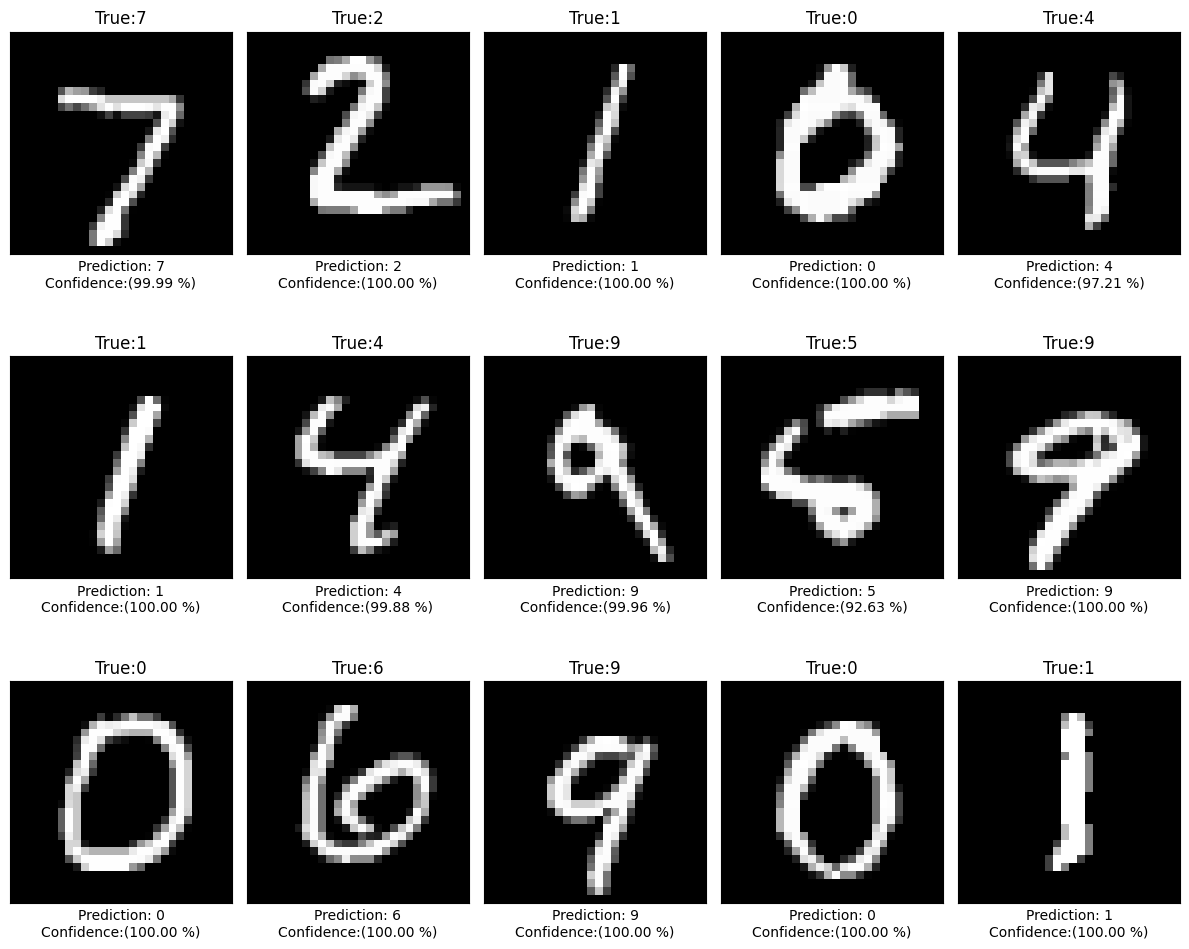

In [58]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True:{y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence:({confidence:.2f} %)')
plt.tight_layout()
plt.show()